<a href="https://colab.research.google.com/github/kotatakehara/Self-efficacy/blob/draft/Fact_data_process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### すること
2次元における、正規分布を活用した成功率を算出するコードの作成 \\
numpyに変更 ←現在これを行っている \\
クラス化を行う ←現在これを行っている \\


---
### 終わったこと
OneDriveのけん玉データをダウンロードせずに常に使用できるようにする←現在これを行っている \\
プログラムの成功失敗の判定などの下地を作成 \\
成功した時と失敗した時の処理を行うコードを書く \\


In [9]:
# GoogleドライブをGoogle Colabにマウント
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
#pandasをインポート
import glob
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

original_pattern = '/content/drive/MyDrive/kendama_202310_inamura/id01_self/*.csv'
#名前を変更して複数のファイルをループさせるためのコード

# for i in range(1, 11):  # 1から9までの数字でループ
#     # new_number = '{:02d}'.format(i)  # 2桁の数字にフォーマット
#     new_pattern = original_pattern.replace('id01_self', 'id{:02d}_self'.format(i))  # 数字部分を置換
#     Kendama_file_path = glob.glob(new_pattern)

# Kendama_file_path = glob.glob('/content/drive/MyDrive/kendama_202310_inamura/id03_self/*.csv') #すべてのCSVファイルのパスがリストとして取得
# Kendama_file_path = sorted(Kendama_file_path)
# df=pd.read_csv(Kendama_file_path[2],engine='python') #CSVファイルのパスを指定
# df.head()

In [20]:
# #成功した時と失敗した時の処理の分散に対する処理などを行うために、成功と失敗の確認を行うコード
# for index, row in df.iterrows(): #1行目から順番に内容を取得している処理
#   if abs(row['ball.Position.y'] - row['sword.Position.y']) <= 0.1: #玉がplateに乗っているもしくは直前かどうか
#     if (row['ball.Position.x'] - row['sword.Position.x'])**2 + (row['ball.Position.z'] - row['sword.Position.z'])**2 <= (row['ColliderSize']/100)**2: #皿内に玉が入っているかどうか
#       print("成功")
#   if "fail" in Kendama_file_path[1]:
#     succ_check = False
#   else:
#     succ_check = True
# print(succ_check)

In [21]:
original_pattern = '/content/drive/MyDrive/kendama_202310_inamura/id01_self/*.csv'
#名前を変更して複数のファイルをループさせるためのコード
A_x_L = []
A_p_L = []
A_dispersion_L = []
A_Abs_degree_failure_L = []
A_srate_L = []
for j in range(1, 11):  # 1から10までの数字でループ
    # new_number = '{:02d}'.format(i)  # 2桁の数字にフォーマット
    new_pattern = original_pattern.replace('id01_self', 'id{:02d}_self'.format(j))  # 数字部分を置換
    Kendama_file_path = glob.glob(new_pattern)
    Kendama_file_path = sorted(Kendama_file_path) #ファイルの順番がおかしいので並び替えを行うコード
    #成功した時と失敗した時の処理を行うコード
    dispersion = []     #被験者のやる気を表す分散を格納する配列
    Abs_degree_failure = []
    x = []  #試行回数を格納
    success = 0
    srate = []
    succ_check = True
    #他の初期値の宣言を書く（abs_degree_failureなど）

    for i in range(len(Kendama_file_path)):
      data_check = True #dataが正しいのかのチェックを行う。もし、おかしければ１つ前の施工データを使用するようにする
      x.append(i+1)
      if "fail" in Kendama_file_path[i]:
        succ_check = False
      else:
        succ_check = True
      df=pd.read_csv(Kendama_file_path[i],engine='python') #CSVファイルのパスを指定

      for index, row in df.iterrows(): #1行目から順番に内容を取得している処理
        if i == 0:
          p = [[row['sword.Position.x'],row['sword.Position.y']]] #皿のガウス分布の平均値を格納する配列
        if succ_check: #成功した時
          if abs(row['ball.Position.y'] - row['sword.Position.y']) <= 0.05: #玉がplateに乗っているもしくは直前かどうか
            data_check = False
            p.append([row['sword.Position.x'],row['sword.Position.y']]) #plateの原点を次回の平均値に入れる
            abs_degree_failure = abs(np.sqrt((row['ball.Position.x'] - row['sword.Position.x'])**2 + (row['ball.Position.z'] - row['sword.Position.z'])**2)) #皿の中心と落下位置の差（絶対値）
            Abs_degree_failure.append(abs_degree_failure)
            variance_x = (row['sword.Position.x']-p[i][0])**2 #分散を求める一般的な公式である、データから平均を引いて２乗した値を分散にした（値は１つしか使わないので１で割る）←正確に行うなら、一定の差の高さの時の値を全て使うとおそらく良い
            variance_y = (row['sword.Position.y']-p[i][1])**2
            dispersion.append([variance_x,variance_y])
            success += 1
            srate.append((success/(i+1))*100)
            # sigma = sigma/alpha
            break
        else: #失敗した時
          if abs(row['ball.Position.y'] - row['sword.Position.y']) <= 0.1: #玉がplateに乗っているもしくは直前かどうか
            data_check = False
            p.append([row['ball.Position.x'],row['ball.Position.y']]) #玉の落下位置を次回の平均値に入れる
            abs_degree_failure = abs(np.sqrt((row['ball.Position.x'] - row['sword.Position.x'])**2 + (row['ball.Position.z'] - row['sword.Position.z'])**2)) #皿の中心と落下位置の差（絶対値）
            Abs_degree_failure.append(abs_degree_failure)
            variance_x = (row['sword.Position.x']-p[i][0])**2 #分散を求める一般的な公式である、データから平均を引いて２乗した値を分散にした（値は１つしか使わないので１で割る）←正確に行うなら、一定の差の高さの時の値を全て使うとおそらく良い
            variance_y = (row['sword.Position.y']-p[i][1])**2 #このコードは分散とは言えない
            dispersion.append([variance_x,variance_y])
            srate.append((success/(i+1))*100)
            # sigma = sigma*beta
            break
      if data_check: #dataに何らかの不備があった場合の応急処置のコード
        p.append(p[i])
        Abs_degree_failure.append(Abs_degree_failure[i-1])
        dispersion.append(dispersion[i-1])
        srate.append(srate[i-1])
    # x.append(len(Kendama_file_path))
    del p[0]
    A_x_L.append(x)
    A_p_L.append(p) #要素が２１こあるため先頭の要素を削るコードが必要かも？
    A_dispersion_L.append(dispersion)
    A_Abs_degree_failure_L.append(Abs_degree_failure)
    A_srate_L.append(srate)


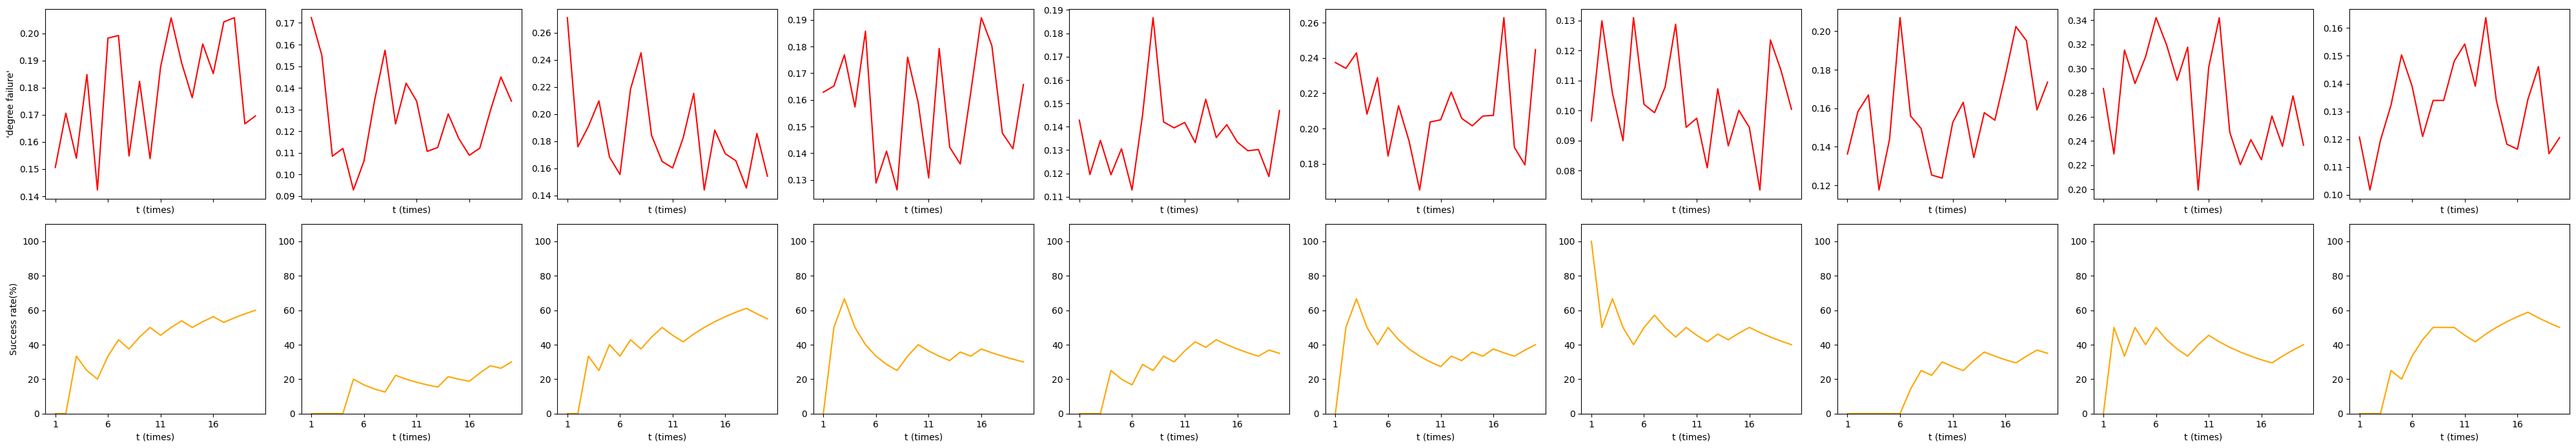

In [22]:
fig, axs = plt.subplots(2, len(A_x_L),figsize=(40, 7), sharex=True)

for i in range(10):
  axs[0, i].plot(A_x_L[i], A_Abs_degree_failure_L[i], color='r')
  # axs[1, i].plot(A_x_L[i], [item[0] for item in A_dispersion_L[i]], color='b')
  axs[1, i].plot(A_x_L[i], A_srate_L[i], color='orange')



  # axs[0,i].set_ylim(0.19, 0.2)
  # axs[1,i].set_ylim(0, 2)
  axs[1,i].set_ylim(0, 110)

  # axs[0, i].set_yticks(np.arange(0.19, 0.2, step=0.001))
  # axs[1, i].set_yticks(np.arange(0, 2.5, step=0.5))
  # axs[2, i].set_yticks(np.arange(0, 120, step=20))

  for ax in axs.flat:
    ax.set_xlabel("t (times)")

  axs[0, 0].set_ylabel(f"'degree failure'")
  # axs[1, 0].set_ylabel(f"σ_X^2,σ_Y^2")
  axs[1, 0].set_ylabel(f"Success rate(%)")

  axs[0, i].set_xticks(np.arange(min(A_x_L[i]), max(A_x_L[i]) + 1, 5))
plt.tight_layout()
# plt.savefig(f"data_fitting_10.png")
# files.download(f'data_fitting_10.png')
plt.show()


In [24]:
original_pattern = '/content/drive/MyDrive/kendama_202310_inamura/id01_self/*.csv'
#名前を変更して複数のファイルをループさせるためのコード
A_x_L = []
A_p_L = []
A_dispersion_L = []
A_Abs_degree_failure_L = []
A_srate_L = []
abs_degree_failure_L = []
variance_x_L = []
variance_y_L = []
for j in range(1, 11):  # 1から10までの数字でループ
    # new_number = '{:02d}'.format(i)  # 2桁の数字にフォーマット
    new_pattern = original_pattern.replace('id01_self', 'id{:02d}_self'.format(j))  # 数字部分を置換
    Kendama_file_path = glob.glob(new_pattern)
    Kendama_file_path = sorted(Kendama_file_path) #ファイルの順番がおかしいので並び替えを行うコード

    #成功した時と失敗した時の処理を行うコード
    dispersion = []     #被験者のやる気を表す分散を格納する配列
    Abs_degree_failure = []
    x = []  #試行回数を格納
    success_sum = 0
    srate = []
    succ_check = True
    abs_degree_failure_sum = 0
    variance_x_sum = 0
    variance_y_sum = 0
    success_sum = 0
    #他の初期値の宣言を書く（abs_degree_failureなど）

    for i in range(len(Kendama_file_path)):
      df=pd.read_csv(Kendama_file_path[i],engine='python') #CSVファイルのパスを指定
      data_check = True #dataが正しいのかのチェックを行う。もし、おかしければ１つ前の施工データを使用するようにする

      if "fail" in Kendama_file_path[i]:
        succ_check = False
      else:
        succ_check = True
      for index, row in df.iterrows(): #1行目から順番に内容を取得している処理
        if i == 0:
          p = [[row['sword.Position.x'],row['sword.Position.y']]] #皿のガウス分布の平均値を格納する配列
        if succ_check: #成功した時
          if abs(row['ball.Position.y'] - row['sword.Position.y']) <= 0.05: #玉がplateに乗っているもしくは直前かどうか
            p.append([row['sword.Position.x'],row['sword.Position.y']]) #plateの原点を次回の平均値に入れる
            abs_degree_failure = abs(np.sqrt((row['ball.Position.x'] - row['sword.Position.x'])**2 + (row['ball.Position.z'] - row['sword.Position.z'])**2)) #皿の中心と落下位置の差（絶対値）
            abs_degree_failure_sum += abs_degree_failure
            variance_x = (row['sword.Position.x']-p[i][0])**2 #分散を求める一般的な公式である、データから平均を引いて２乗した値を分散にした（値は１つしか使わないので１で割る）←正確に行うなら、一定の差の高さの時の値を全て使うとおそらく良い
            variance_y = (row['sword.Position.y']-p[i][1])**2
            variance_x_sum += variance_x #分散を求める一般的な公式である、データから平均を引いて２乗した値を分散にした（値は１つしか使わないので１で割る）←正確に行うなら、一定の差の高さの時の値を全て使うとおそらく良い
            variance_y_sum += variance_y
            success_sum += 1
            data_check = False
            # sigma = sigma/alpha
            break
        else: #失敗した時
          if abs(row['ball.Position.y'] - row['sword.Position.y']) <= 0.1: #玉がplateに乗っているもしくは直前かどうか
            p.append([row['sword.Position.x'],row['sword.Position.y']]) #plateの原点を次回の平均値に入れる
            abs_degree_failure = abs(np.sqrt((row['ball.Position.x'] - row['sword.Position.x'])**2 + (row['ball.Position.z'] - row['sword.Position.z'])**2)) #皿の中心と落下位置の差（絶対値）
            abs_degree_failure_sum += abs_degree_failure
            variance_x = (row['sword.Position.x']-p[i][0])**2 #分散を求める一般的な公式である、データから平均を引いて２乗した値を分散にした（値は１つしか使わないので１で割る）←正確に行うなら、一定の差の高さの時の値を全て使うとおそらく良い
            variance_y = (row['sword.Position.y']-p[i][1])**2
            variance_x_sum += variance_x #分散を求める一般的な公式である、データから平均を引いて２乗した値を分散にした（値は１つしか使わないので１で割る）←正確に行うなら、一定の差の高さの時の値を全て使うとおそらく良い
            variance_y_sum += variance_y
            # sigma = sigma*beta
            data_check = False
            break
      if data_check: #dataに何らかの不備があった場合の応急処置のコード
        p.append(p[i])
        abs_degree_failure_sum += abs_degree_failure
        variance_x_sum += variance_x #分散を求める一般的な公式である、データから平均を引いて２乗した値を分散にした（値は１つしか使わないので１で割る）←正確に行うなら、一定の差の高さの時の値を全て使うとおそらく良い
        variance_y_sum += variance_y
      if (i+1)%5 == 0:
        dispersion.append([variance_x_sum/5,variance_y_sum/5])
        Abs_degree_failure.append(abs_degree_failure_sum/5)
        srate.append((success_sum/5)*100)
        abs_degree_failure_sum = 0
        variance_x_sum = 0
        variance_y_sum = 0
        success_sum = 0
        x.append((i+1)//5)
    del p[0]
    A_x_L.append(x)
    A_p_L.append(p)
    A_dispersion_L.append(dispersion)
    A_Abs_degree_failure_L.append(Abs_degree_failure)
    A_srate_L.append(srate)


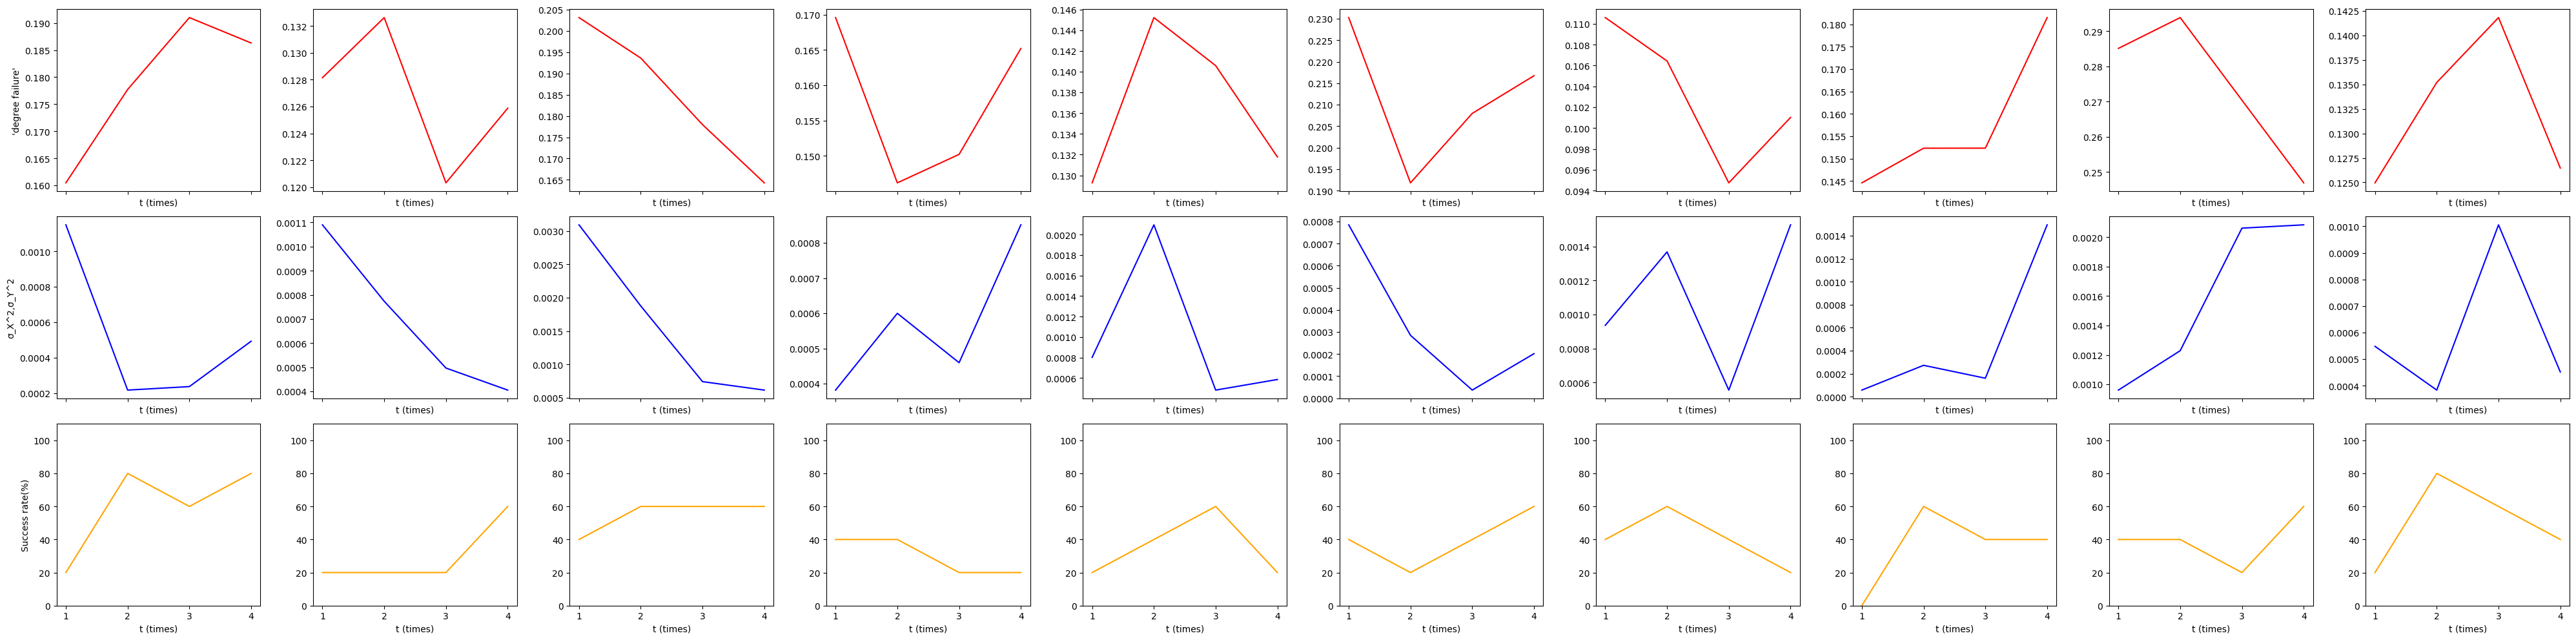

In [25]:
fig, axs = plt.subplots(3, len(A_x_L),figsize=(40, 10), sharex=True)

for i in range(10):
  axs[0, i].plot(A_x_L[i], A_Abs_degree_failure_L[i], color='r')
  axs[1, i].plot(A_x_L[i], [item[0] for item in A_dispersion_L[i]], color='b')
  axs[2, i].plot(A_x_L[i], A_srate_L[i], color='orange')



  # axs[0,i].set_ylim(0.19, 0.2)
  # axs[1,i].set_ylim(0, 2)
  axs[2,i].set_ylim(0, 110)

  # axs[0, i].set_yticks(np.arange(0.19, 0.2, step=0.001))
  # axs[1, i].set_yticks(np.arange(0, 2.5, step=0.5))
  # axs[2, i].set_yticks(np.arange(0, 120, step=20))

  for ax in axs.flat:
    ax.set_xlabel("t (times)")

  axs[0, 0].set_ylabel(f"'degree failure'")
  axs[1, 0].set_ylabel(f"σ_X^2,σ_Y^2")
  axs[2, 0].set_ylabel(f"Success rate(%)")

  axs[0, i].set_xticks(np.arange(min(A_x_L[i]), max(A_x_L[i]) + 1, 1))
plt.tight_layout()
# plt.savefig(f"data_fitting_20_5.png")
# files.download(f'data_fitting_20_5.png')
plt.show()


ここから以降は昔のわかりにくいデータを使用する際のフィッテング

In [ ]:
#pandasをインポート
import pandas as pd
df = pd.read_excel("/content/no10_cutting.xlsx")

In [ ]:
df.head()

,ElapsedTime,ball.Position.x,ball.Position.y,ball.Position.z,sword.Position.x,sword.Position.y,sword.Position.z,ball.Velocity.x,ball.Velocity.y,ball.Velocity.z,ResetFlag,GazeTarget
0,0.000000,0.2606,0.7784,-0.4553,0.2617,1.3104,-0.4544,0.002752,-0.003913,-0.021396,NaN,
1,0.053991,0.2608,0.7771,-0.4564,0.2616,1.3094,-0.4550,0.002882,-0.005460,-0.020489,NaN,
2,0.066622,0.2609,0.7771,-0.4566,0.2613,1.3090,-0.4553,0.003235,-0.010349,-0.020561,NaN,
3,0.088489,0.2610,0.7765,-0.4571,0.2615,1.3085,-0.4555,0.003476,-0.009863,-0.019746,NaN,
4,0.098632,0.2610,0.7762,-0.4573,0.2616,1.3083,-0.4557,0.003800,-0.014079,-0.019342,NaN,sword


In [ ]:
conduct_check = True #けん玉をしている状態を確認して良いかの判定を行う変数（ResetFlagが検出されるとTrueになる）
velocity_check = False #球のベクトルが一定値以上になった後にマイナスで下に落ちているかの判定を行う変数
position_check = False #球が剣よりも高い場所にあるのかの判定を行う変数
conduct_count = 0 #けん玉を行った回数をカウントする変数

for index, row in df.iterrows(): #1行目から順番に内容を取得している処理
  if conduct_check:
    if (not velocity_check) and (row['ball.Velocity.y'] >= 2):  #ベクトルが一定値である２より大きくなった場合、けん玉を行っているかの判定を開始
      velocity_check = True
    elif velocity_check and row['ball.Velocity.y'] <= 0:  #ベクトルがマイナスになった場合、玉が上がった後に落ちていると判定
      position_check = True
      velocity_check = False
    elif position_check:
      if row['ball.Position.y'] >= row['sword.Position.y']: #玉が剣よりも高い位置にある場合、けん玉を行っていると判定
        position_check = False
        conduct_check = False
        conduct_count += 1
  else:
    if row["ResetFlag"] == 1: #リセットされた場合、けん玉を行っているかどうかの判定を再開できるように値を入れる
      conduct_check = True
print(conduct_count)

905


In [ ]:
# 1から空に変わった回数をカウントする変数
to_empty_count = 0
# 空から1に変わった回数をカウントする変数
from_empty_count = 0

# 前の行のResetFlagの値を保存する変数
previous_value = None

# DataFrameをイテレーションして変化を検出
for index, row in df.iterrows():
    current_value = row['ResetFlag']
    if previous_value == 1 and pd.isnull(current_value): #Pandasライブラリのisnull()関数を使用して、値が欠損値（NaN）かどうかを確認しています。
        to_empty_count += 1
    elif pd.isnull(previous_value) and current_value == 1:
        from_empty_count += 1
    previous_value = current_value

print("1から空に変わった回数:", to_empty_count)
print("空から1に変わった回数:", from_empty_count)

1から空に変わった回数: 1196
空から1に変わった回数: 1196


In [ ]:
df2 = pd.read_excel("/content/no2_cutting.xlsx")

In [ ]:
conduct_check = True #けん玉をしている状態を確認して良いかの判定を行う変数（ResetFlagが検出されるとTrueになる）
velocity_check = False #球のベクトルが一定値以上になった後にマイナスで下に落ちているかの判定を行う変数
position_check = False #球が剣よりも高い場所にあるのかの判定を行う変数
conduct_count = 0 #けん玉を行った回数をカウントする変数

for index, row in df2.iterrows(): #1行目から順番に内容を取得している処理
  if conduct_check:
    if (not velocity_check) and (row['ball.Velocity.y'] >= 2):  #ベクトルが一定値である２より大きくなった場合、けん玉を行っているかの判定を開始
      velocity_check = True
    elif velocity_check and row['ball.Velocity.y'] <= 0:  #ベクトルがマイナスになった場合、玉が上がった後に落ちていると判定
      position_check = True
      velocity_check = False
    elif position_check:
      if row['ball.Position.y'] >= row['sword.Position.y']: #玉が剣よりも高い位置にある場合、けん玉を行っていると判定
        position_check = False
        conduct_check = False
        conduct_count += 1
  else:
    if row["ResetFlag"] == 1: #リセットされた場合、けん玉を行っているかどうかの判定を再開できるように値を入れる
      conduct_check = True
print(conduct_count)

503


In [ ]:
# 1から空に変わった回数をカウントする変数
to_empty_count = 0
# 空から1に変わった回数をカウントする変数
from_empty_count = 0

# 前の行のResetFlagの値を保存する変数
previous_value = None

# DataFrameをイテレーションして変化を検出
for index, row in df2.iterrows():
    current_value = row['ResetFlag']
    if previous_value == 1 and pd.isnull(current_value):
        to_empty_count += 1
    elif pd.isnull(previous_value) and current_value == 1:
        from_empty_count += 1
    previous_value = current_value

print("1から空に変わった回数:", to_empty_count)
print("空から1に変わった回数:", from_empty_count)

1から空に変わった回数: 636
空から1に変わった回数: 636
